In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from zimp.readability.winnetka import PrepositionFrequencyScore, PosMethod
from glob import glob

plt.style.use('seaborn-whitegrid')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!


In [2]:
source_dir = '../../zimp_orchestrator/orch/resources'
files = {}
for ds_path in glob(source_dir + '/*'):
    if not os.path.isdir(ds_path):
        continue
    ds_name = os.path.basename(ds_path)
    files[ds_name] = [os.path.join(ds_path, 'train.csv'), os.path.join(ds_path, 'test.csv')]

In [3]:
def get_scores(paths, r_metric, track_name):
    texts = pd.read_csv(paths[0]).text.append(pd.read_csv(paths[1]).text)
    scores = []
    for txt in tqdm(texts):
        scores.append(r_metric.get_score(txt))
    s = pd.Series(scores, name=track_name)
    return s

def get_ds_language(track):
    if track in ['10K-GNAD', 'GERMEVAL-2018', 'GERMEVAL-2020']:
        return 'german'
    return 'english'

In [4]:
dfs = []
for dataset in files.keys():
    print(f'Analyzing {dataset}...')
    path = f'pf_score/{dataset}_spacy.csv'
    if os.path.exists(path):
        s = pd.read_csv(path)[dataset+'_spacy']
    else:
        s = get_scores(files[dataset], PrepositionFrequencyScore(language=get_ds_language(dataset), pos_method=PosMethod.SPACY), f'{dataset}_spacy')
        s.to_csv(path, index=False)
    dfs.append(s)
    
    path = f'pf_score/{dataset}_stanza.csv'
    if os.path.exists(path):
        s = pd.read_csv(path)[dataset+'_stanza']
    else:
        s = get_scores(files[dataset], PrepositionFrequencyScore(language=get_ds_language(dataset), pos_method=PosMethod.STANZA), f'{dataset}_stanza')
        s.to_csv(path, index=False)
    dfs.append(s)

df = pd.concat(dfs, axis=1)
df_rel = df/df.sum(axis=0)
df_rel

Analyzing 10K-GNAD...
Analyzing DBP-14...
Analyzing GERMEVAL-2018...
Analyzing GERMEVAL-2020...
Analyzing TREC-6...
Analyzing YELP-5...


,10K-GNAD_spacy,10K-GNAD_stanza,DBP-14_spacy,DBP-14_stanza,GERMEVAL-2018_spacy,GERMEVAL-2018_stanza,GERMEVAL-2020_spacy,GERMEVAL-2020_stanza,TREC-6_spacy,TREC-6_stanza,YELP-5_spacy,YELP-5_stanza
0,0.000134,0.000119,0.000002,0.000002,0.000190,0.000195,0.000006,0.000012,0.000000,0.000226,1.867726e-06,1.429595e-06
1,0.000081,0.000082,0.000002,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.534204e-06,1.464529e-06
2,0.000086,0.000085,0.000002,0.000002,0.000142,0.000160,0.000000,0.000000,0.000187,0.000188,2.350379e-06,2.344602e-06
3,0.000133,0.000128,0.000002,0.000002,0.000074,0.000073,0.000005,0.000005,0.000346,0.000347,1.683295e-06,1.366893e-06
4,0.000099,0.000097,0.000001,0.000001,0.000180,0.000195,0.000005,0.000005,0.000281,0.000282,1.565394e-06,1.415085e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
699995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.795515e-06,1.688864e-06
699996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
699997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.675633e-07,8.324030e-07
699998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.228065e-06,1.364717e-06


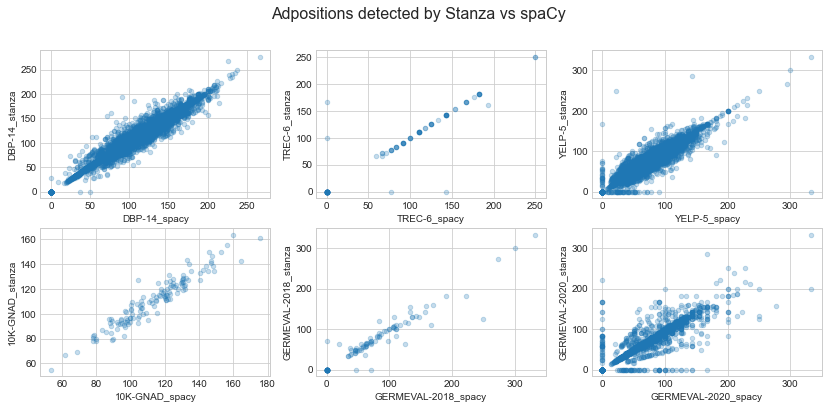

In [5]:
fig,a =  plt.subplots(2,3, figsize=(14,6))
fig.suptitle('Adpositions detected by Stanza vs spaCy', fontsize=16)
for i, ds in enumerate(['DBP-14', 'TREC-6', 'YELP-5', '10K-GNAD', 'GERMEVAL-2018', 'GERMEVAL-2020']):
    df.sample(10000).plot(kind='scatter', x=f'{ds}_spacy', y=f'{ds}_stanza', ax=a[i//3, i%3], alpha=.25)
    
plt.savefig(f'pf_score/012_adpos_stanza_spacy.pdf')

In [6]:
for ds in ['DBP-14', 'TREC-6', 'YELP-5', '10K-GNAD', 'GERMEVAL-2018', 'GERMEVAL-2020']:
    print(ds, df[f'{ds}_spacy'].corr(df[f'{ds}_stanza']))

DBP-14 0.9743473112968889
TREC-6 0.974554534016028
YELP-5 0.9320513975247406
10K-GNAD 0.9633061332574212
GERMEVAL-2018 0.9258605948835823
GERMEVAL-2020 0.8792540403831097


In [7]:
idxs = (df['TREC-6_spacy'] - df['TREC-6_stanza']).sort_values()
idxs[idxs.index < 5000]

1089   -166.666667
100    -166.666667
4912   -142.857143
3171   -142.857143
4856   -125.000000
           ...    
4082    142.857143
4854    142.857143
2997    142.857143
2237    142.857143
3848    181.818182
Length: 5000, dtype: float64

In [8]:
txts = pd.read_csv(files['TREC-6'][0]).text

In [9]:
txts.loc[2237]

'What river is Pocahontas buried along ?'

### English qualitative analysis

In [10]:
spacy_model = PrepositionFrequencyScore(language='english', pos_method=PosMethod.SPACY).prep_extractor.base_model
stanza_model = PrepositionFrequencyScore(language='english', pos_method=PosMethod.STANZA).prep_extractor.base_model

def qual_analysis(txt):
    sp_toks = spacy_model(txt)
    st_toks = [w for s in stanza_model(txt).sentences for w in s.words]
    print('SPACY:', [t.text + '--' + t.pos_ for t in sp_toks])
    print('STANZA:', [t.text + '--' + t.upos for t in st_toks])

2022-07-10 19:21:25 INFO: Downloading default packages for language: en (English)...
2022-07-10 19:21:27 INFO: File exists: C:\Users\Martin\stanza_resources\en\default.zip
2022-07-10 19:21:32 INFO: Finished downloading models and saved to C:\Users\Martin\stanza_resources.


2022-07-10 19:21:32 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |

2022-07-10 19:21:32 INFO: Use device: cpu
2022-07-10 19:21:32 INFO: Loading: tokenize
2022-07-10 19:21:32 INFO: Loading: pos
2022-07-10 19:21:33 INFO: Done loading processors!


In [11]:
qual_analysis('What generation am I in ?')
# stanza right

SPACY: ['What--DET', 'generation--NOUN', 'am--AUX', 'I--PRON', 'in--ADV', '?--PUNCT']
STANZA: ['What--DET', 'generation--NOUN', 'am--AUX', 'I--PRON', 'in--ADP', '?--PUNCT']


In [12]:
qual_analysis('Who invented Make-up ?')
# spacy right

SPACY: ['Who--PRON', 'invented--VERB', 'Make--PROPN', '---PUNCT', 'up--NOUN', '?--PUNCT']
STANZA: ['Who--PRON', 'invented--VERB', 'Make--VERB', '---PUNCT', 'up--ADP', '?--PUNCT']


In [13]:
qual_analysis('Who loved Flash Gordon besides Dale?')
# stanza right?

SPACY: ['Who--PRON', 'loved--VERB', 'Flash--PROPN', 'Gordon--PROPN', 'besides--SCONJ', 'Dale--PROPN', '?--PUNCT']
STANZA: ['Who--PRON', 'loved--VERB', 'Flash--PROPN', 'Gordon--PROPN', 'besides--ADP', 'Dale--PROPN', '?--PUNCT']


In [14]:
qual_analysis('What happens to used motor oil?')
# spacy right? 

SPACY: ['What--PRON', 'happens--VERB', 'to--PART', 'used--VERB', 'motor--NOUN', 'oil--NOUN', '?--PUNCT']
STANZA: ['What--PRON', 'happens--VERB', 'to--ADP', 'used--VERB', 'motor--NOUN', 'oil--NOUN', '?--PUNCT']


In [15]:
qual_analysis('Why do airliners crash vs. gliding down ?')
# stanza right

SPACY: ['Why--SCONJ', 'do--AUX', 'airliners--VERB', 'crash--VERB', 'vs.--ADP', 'gliding--VERB', 'down--ADV', '?--PUNCT']
STANZA: ['Why--ADV', 'do--AUX', 'airliners--NOUN', 'crash--VERB', 'vs.--ADP', 'gliding--VERB', 'down--ADP', '?--PUNCT']


In [16]:
qual_analysis('What is a fear of sinning?')

SPACY: ['What--PRON', 'is--AUX', 'a--DET', 'fear--NOUN', 'of--ADP', 'sinning--VERB', '?--PUNCT']
STANZA: ['What--PRON', 'is--AUX', 'a--DET', 'fear--NOUN', 'of--SCONJ', 'sinning--VERB', '?--PUNCT']


In [17]:
qual_analysis('What can be done about snoring?')

SPACY: ['What--PRON', 'can--AUX', 'be--AUX', 'done--VERB', 'about--ADP', 'snoring--VERB', '?--PUNCT']
STANZA: ['What--PRON', 'can--AUX', 'be--AUX', 'done--VERB', 'about--SCONJ', 'snoring--VERB', '?--PUNCT']


In [18]:
qual_analysis('What river is Pocahontas buried along?')

SPACY: ['What--DET', 'river--NOUN', 'is--AUX', 'Pocahontas--PROPN', 'buried--VERB', 'along--ADP', '?--PUNCT']
STANZA: ['What--DET', 'river--NOUN', 'is--AUX', 'Pocahontas--PROPN', 'buried--VERB', 'along--ADV', '?--PUNCT']


### German qualitative analysis 

In [19]:
spacy_model = PrepositionFrequencyScore(language='german', pos_method=PosMethod.SPACY).prep_extractor.base_model
stanza_model = PrepositionFrequencyScore(language='german', pos_method=PosMethod.STANZA).prep_extractor.base_model

def qual_analysis(txt):
    sp_toks = spacy_model(txt)
    st_toks = [w for s in stanza_model(txt).sentences for w in s.words]
    print('SPACY:', [t.text + '--' + t.pos_ for t in sp_toks])
    print('STANZA:', [t.text + '--' + t.upos for t in st_toks])

2022-07-10 19:21:36 INFO: Downloading default packages for language: de (German)...
2022-07-10 19:21:39 INFO: File exists: C:\Users\Martin\stanza_resources\de\default.zip
2022-07-10 19:21:44 INFO: Finished downloading models and saved to C:\Users\Martin\stanza_resources.


2022-07-10 19:21:44 WARNING: Language de package default expects mwt, which has been added
2022-07-10 19:21:44 INFO: Loading these models for language: de (German):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| pos       | gsd     |

2022-07-10 19:21:44 INFO: Use device: cpu
2022-07-10 19:21:44 INFO: Loading: tokenize
2022-07-10 19:21:44 INFO: Loading: mwt
2022-07-10 19:21:45 INFO: Loading: pos
2022-07-10 19:21:45 INFO: Done loading processors!


In [20]:
qual_analysis('@SKoerzell Gratuliere ihm herzlich von mit!')
# stanza misclassifies 'mit' as adv

SPACY: ['@SKoerzell--PROPN', 'Gratuliere--NOUN', 'ihm--PRON', 'herzlich--ADV', 'von--ADP', 'mit--ADV', '!--PUNCT']
STANZA: ['@SKoerzell--PROPN', 'Gratuliere--VERB', 'ihm--PRON', 'herzlich--ADJ', 'von--ADP', 'mit--ADP', '!--PUNCT']


In [21]:
qual_analysis('@Dagobert95 Das Badnerlied ist am besten!')
# stanza misclassifies 'am besten'

SPACY: ['@Dagobert95--NOUN', 'Das--DET', 'Badnerlied--NOUN', 'ist--AUX', 'am--PART', 'besten--ADV', '!--PUNCT']
STANZA: ['@Dagobert95--NUM', 'Das--DET', 'Badnerlied--NOUN', 'ist--AUX', 'an--ADP', 'dem--DET', 'besten--ADJ', '!--PUNCT']


In [22]:
qual_analysis('US-Experte sagt Deutschlands Untergang voraus')
# stanza correctly classifies 'voraus' as adverb

SPACY: ['US-Experte--NOUN', 'sagt--VERB', 'Deutschlands--PROPN', 'Untergang--NOUN', 'voraus--ADP']
STANZA: ['US--PROPN', '---PUNCT', 'Experte--NOUN', 'sagt--VERB', 'Deutschlands--PROPN', 'Untergang--NOUN', 'voraus--ADV']


In [23]:
qual_analysis('Er lacht zu viel')

SPACY: ['Er--PRON', 'lacht--VERB', 'zu--PART', 'viel--PRON']
STANZA: ['Er--PRON', 'lacht--VERB', 'zu--ADV', 'viel--ADV']


In [24]:
qual_analysis('Doitsche kauft nicht bai Türken')
# spacy correctly classifies as ADP

SPACY: ['Doitsche--NOUN', 'kauft--VERB', 'nicht--PART', 'bai--ADP', 'Türken--NOUN']
STANZA: ['Doitsche--NOUN', 'kauft--VERB', 'nicht--PART', 'bai--ADJ', 'Türken--NOUN']


In [25]:
qual_analysis('@lizvlx @msulzbacher Weshalb? Antisemitismus, der sich auf auf Israel bezieht ist nach wie vor Antisemitismus')
# both wron?? adverb?

SPACY: ['@lizvlx--PROPN', '@msulzbacher--ADJ', 'Weshalb--NOUN', '?--PUNCT', 'Antisemitismus--NOUN', ',--PUNCT', 'der--PRON', 'sich--PRON', 'auf--ADP', 'auf--ADP', 'Israel--PROPN', 'bezieht--VERB', 'ist--AUX', 'nach--ADV', 'wie--CCONJ', 'vor--ADP', 'Antisemitismus--NOUN']
STANZA: ['@lizvlx--ADJ', '@msulzbacher--ADJ', 'Weshalb--ADV', '?--PUNCT', 'Antisemitismus--NOUN', ',--PUNCT', 'der--PRON', 'sich--PRON', 'auf--ADP', 'auf--ADP', 'Israel--PROPN', 'bezieht--VERB', 'ist--AUX', 'nach--ADP', 'wie--ADP', 'vor--ADP', 'Antisemitismus--NOUN']


In [26]:
qual_analysis('Wohl zu viel Weihwasser gesoffen.')
# spacy feels right?

SPACY: ['Wohl--ADV', 'zu--PART', 'viel--DET', 'Weihwasser--NOUN', 'gesoffen--VERB', '.--PUNCT']
STANZA: ['Wohl--ADV', 'zu--ADP', 'viel--PRON', 'Weihwasser--NOUN', 'gesoffen--VERB', '.--PUNCT']


In [27]:
qual_analysis('@BILD Gut gemacht Mr Präsident 👍👍')
# spacy is wrong

SPACY: ['@BILD--NOUN', 'Gut--NOUN', 'gemacht--VERB', 'Mr--ADP', 'Präsident--NOUN', '👍--NOUN', '👍--NOUN']
STANZA: ['@BILD--PROPN', 'Gut--PROPN', 'gemacht--VERB', 'Mr--PROPN', 'Präsident--NOUN', '👍👍--PUNCT']


In [28]:
qual_analysis('@drumheadberlin @MatthiasLE45 @China_Welt_News Ich bin 60 u. solche Typen sind f. mich das ALLERLETZTE, leider aber typisch f. unsere Medien')
# spacy correct with f. but wrong with u.

SPACY: ['@drumheadberlin--PROPN', '@MatthiasLE45--PROPN', '@China_Welt_News--PROPN', 'Ich--PRON', 'bin--AUX', '60--NUM', 'u.--ADP', 'solche--DET', 'Typen--NOUN', 'sind--AUX', 'f.--ADP', 'mich--PRON', 'das--DET', 'ALLERLETZTE--PROPN', ',--PUNCT', 'leider--ADV', 'aber--ADV', 'typisch--ADV', 'f.--ADP', 'unsere--DET', 'Medien--NOUN']
STANZA: ['@drumheadberlin--ADJ', '@--X', 'MatthiasLE45--PROPN', '@China--PROPN', '_Welt--PROPN', '_News--PROPN', 'Ich--PRON', 'bin--AUX', '60--NUM', 'u--NOUN', '.--PUNCT', 'solche--PRON', 'Typen--NOUN', 'sind--AUX', 'f.--VERB', 'mich--PRON', 'das--DET', 'ALLERLETZTE--NOUN', ',--PUNCT', 'leider--ADV', 'aber--CCONJ', 'typisch--ADV', 'f.--ADV', 'unsere--DET', 'Medien--NOUN']


In [29]:
qual_analysis('@66Freedom66 Stoppt denn keiner diese Dummbacke!')
# spacy wrong

SPACY: ['@66Freedom66--ADP', 'Stoppt--PROPN', 'denn--ADV', 'keiner--PRON', 'diese--DET', 'Dummbacke--NOUN', '!--PUNCT']
STANZA: ['@66Freedom66--NUM', 'Stoppt--VERB', 'denn--ADV', 'keiner--PRON', 'diese--PRON', 'Dummbacke--NOUN', '!--PUNCT']
